# GGSEG Example on PPMI500 Data 
#### Here, we perform data analysis and visualization on neuroimaging data from the Parkinson's Progression Markers Initiative (PPMI).

In [1]:
import ggseg
import pandas as pd
import re

In [2]:
def ggseg_viz(mmfile_path, mmfile_name, measure, atlas, plot_title):
    """
    Visualize mmwide using ggseg library.

    Parameters:
        mmfile_path (str): Path to the mmwide data file.
        mmfile_name (str): Name of the mmwide data file.
        measure (str): Measure to filter columns.
        atlas (str): Atlas type ('dk' or 'jhu').
        plot_title (str): Title for the plot.

    Returns:
        None
    """
    
    # Validate the atlas parameter
    if atlas not in ('dk', 'jhu'):
        raise ValueError("Invalid 'atlas' parameter. Expected 'dk' or 'jhu'.")

    # Load the data from CSV file
    df = pd.read_csv(mmfile_path + mmfile_name, low_memory = False)

    # Filter columns based on the specified measure
    filter_measure = [col for col in df.columns if measure in col]
    df_measure = df[filter_measure]
    
    # Determine the atlas suffix based on the atlas parameter
    atlas_suffix = 'dktregions' if atlas == 'dk' else 'jhu_icbm_labels_1mm'

    # Filter columns based on the atlas suffix
    filter_atlas = [col for col in df_measure.columns if col.endswith(atlas_suffix)]
    df_filtered = df_measure[filter_atlas]
    df_filtered = df_filtered.mean().to_frame().T

    # Remove measure and atlas name from labels
    for col in df_filtered.columns:
        new_col_name = col.split(measure)[1].split(atlas_suffix)[0]
        df_filtered.rename(columns={col: new_col_name}, inplace=True)


    # Apply naming conventions based on the atlas type
    if atlas == 'dk':
        # Apply transformations specific to 'dk' atlas
        df_filtered.columns = [col[1:] for col in df_filtered.columns]
        df_filtered.columns = [col.replace('left_', '').replace('right_', '') + ('_' + col.split('_')[0] if col.startswith('left_') or col.startswith('right_') else '') for col in df_filtered.columns]
        df_filtered.columns = [re.sub(r'_(?!(right|left)$)', '', col) for col in df_filtered.columns]

    
    elif atlas == 'jhu':
        # Apply transformations specific to 'jhu' atlas
        df_filtered.columns = df_filtered.columns.str.strip('._-')
        df_filtered.columns = df_filtered.columns.str.replace(r'_', ' ')
        df_filtered.columns = df_filtered.columns.str.replace(r'fronto.occipital', 'fronto-occipital')
        df_filtered.columns = [re.sub(r'(.)?(left|right)', r' \2', col) for col in df_filtered.columns]
        df_filtered.columns = df_filtered.columns.str.replace(r'left', 'l').str.replace(r'right', 'r')

    data = df_filtered.to_dict(orient='records')[0]

    # Plot using ggseg based on the atlas type
    if atlas == 'jhu':
        ggseg.plot_jhu(data, cmap='hot', figsize=(10, 10), background='k', edgecolor='w', bordercolor='gray', ylabel=measure, title=plot_title)
    elif atlas == 'dk':
        ggseg.plot_dk(data, cmap='hot', figsize=(10, 10), background='k', edgecolor='w', bordercolor='gray', ylabel=measure, title=plot_title)

## Example Usage : T1w

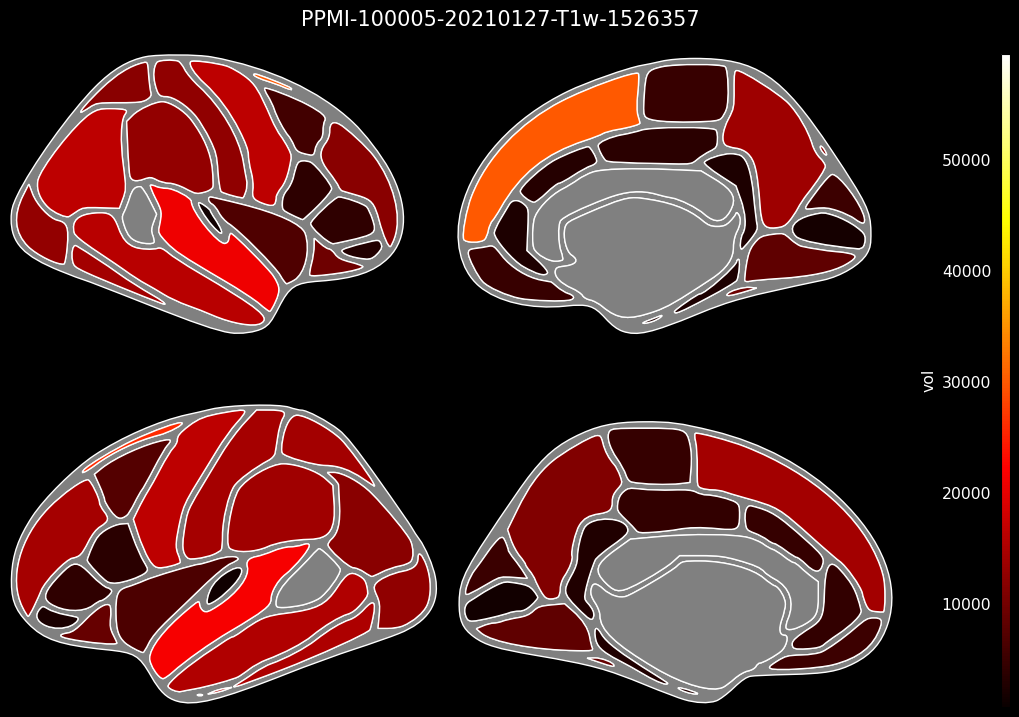

In [3]:
mmfile_path = '/Users/areardon/Desktop/Projects/ggseg/'
mmfile_name = 'PPMI-100005-20210127-T1w-1526357-mmwide.csv'
measure = 'vol'
atlas = 'dk'
plot_title = 'PPMI-100005-20210127-T1w-1526357'
ggseg_viz(mmfile_path, mmfile_name, measure, atlas, plot_title) 

## Example Usage : DTI

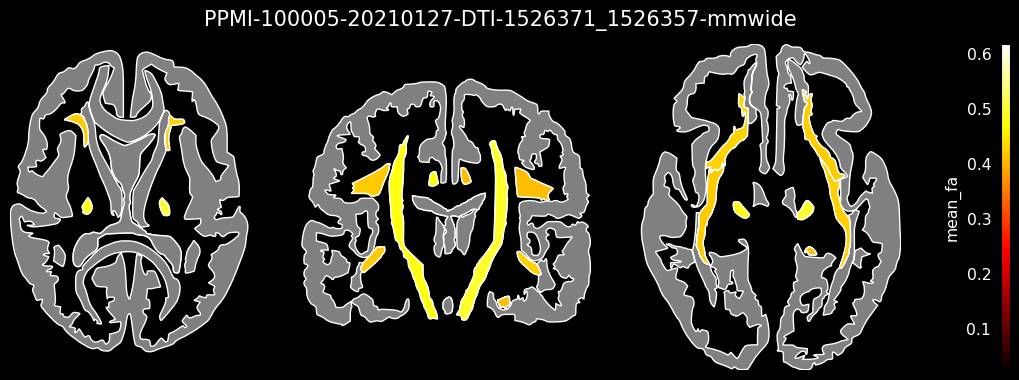

In [4]:
mmfile_path = '/Users/areardon/Desktop/Projects/ggseg/'
mmfile_name = 'PPMI-100005-20210127-DTI-1526371_1526357-mmwide.csv'
measure = 'mean_fa'
atlas = 'jhu'
plot_title = 'PPMI-100005-20210127-DTI-1526371_1526357-mmwide'
ggseg_viz(mmfile_path, mmfile_name, measure, atlas, plot_title) 

## Example Usage : Group Analysis DTI

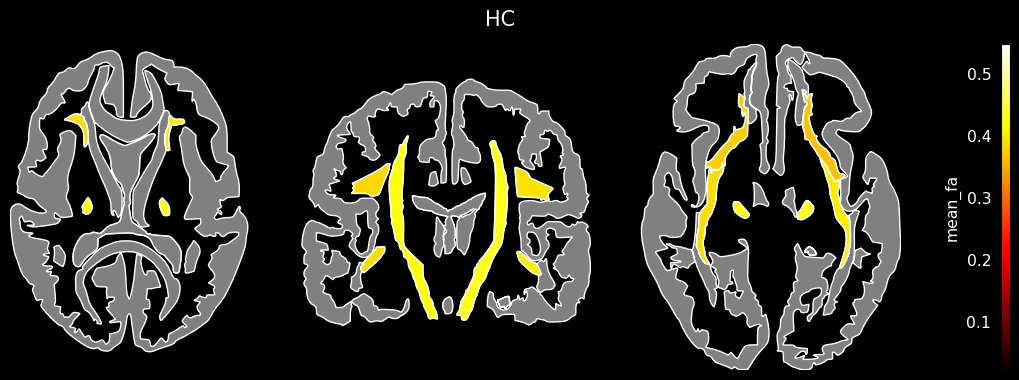

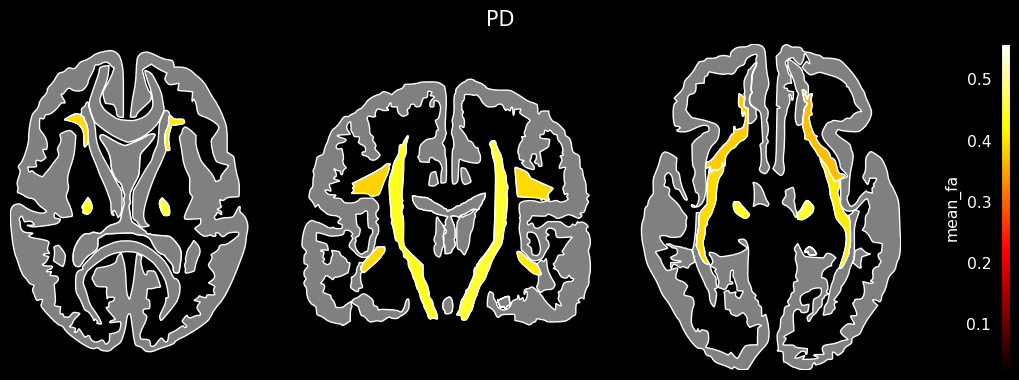

In [5]:
mmfile_path = '/Users/areardon/Desktop/Projects/ggseg/'
group_mmfile_path = 'ppmi_invicro_2023_10_30.csv'

df = pd.read_csv(mmfile_path + group_mmfile_path, low_memory = False)
hc_filename = 'hc_df.csv'
pd_filename = 'pd_df.csv'
hc_df = df[df['DX'] == 'CN']
pd_df = df[df['DX'] == "PD"]
hc_df.to_csv(mmfile_path + hc_filename)
pd_df.to_csv(mmfile_path + pd_filename)

measure = 'mean_fa'
atlas = 'jhu'

ggseg_viz(mmfile_path, hc_filename, measure, atlas, 'HC') 
ggseg_viz(mmfile_path, pd_filename, measure, atlas, 'PD') 
